# Haberman's Cancer Survival Data set

This dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1. Age of patient at time of operations (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive auxillary nodes detected (numerical)
4. Survival Status (Class attribute)
    * 1 = the patient survived 5 years or longer
    * 2 = the patient died within 5 year
    
For further more details and to download the dataset, <a href="https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival">click here</a>

## Exploratory Data Analysis

### Objective:
* classify whether a patient undergone surgery for breast cancer survived more than 5years or died within 5 year.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Haberman's Dataset from the directory
# Let us provide the column names for the features (For details visit the source given above)
columns = ["age", "operationYear", "auxilliaryNode", "output"]
haberman =  pd.read_csv("haberman.csv", header=None, names=columns)
haberman.columns

Index(['age', 'operationYear', 'auxilliaryNode', 'output'], dtype='object')

In [3]:
# how many observations and features are there in this dataset?
print(haberman.shape)

(306, 4)


__Observation__:
1. There are 306 observations and consists of 4 features which includes the class attribute as well.

In [4]:
# How many observations are there for each class?
# How many patient survied longer than 5 years and died before 5 years of surgery?
haberman["output"].value_counts()

1    225
2     81
Name: output, dtype: int64

__Observation:__
Out of 306 patients who have undergone surgery: 
1. 225 survived for more than 5 years.
2. 81 patients died within 5 years of surgery.

### 1. Univariate Analysis

#### 1.1 Probability Density Function (PDF)

/home/ashish/.virtualenvs/ai_venv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


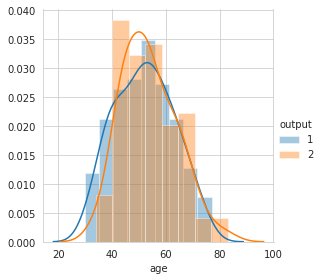

In [5]:
# Let us create a PDF with Age as a parameter.
sns.set_style("whitegrid")
sns.FacetGrid(
    haberman,
    hue = "output", 
    size = 4
).map(
    sns.distplot, 'age'
).add_legend()
plt.show()

__Observation__:
1. From the histogram above, we saw the distribution for output class according to their age is overlapping.
2. Also, the patient having the age greater than 40 are more likely to die.
3. The patient less than age 40 are more likely to survive.

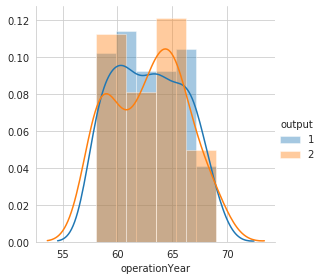

In [6]:
# According to OperationYear
sns.FacetGrid(
    haberman,
    hue="output",
    size=4
).map(
    sns.distplot, "operationYear"
).add_legend()
plt.show()

__Observation :__
1. The plot represents the immense overlapping of two classes.
2. It is clearly seen that patient who had operation in the year between 58-61 and 63-66 died.

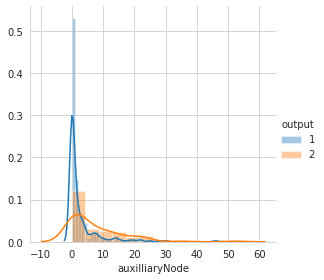

In [8]:
# Auxilliary Nodes
sns.FacetGrid(
    haberman,
    hue="output",
    size=4
).map(
    sns.distplot, "auxilliaryNode"
).add_legend()
plt.show()

__Observations:__
1. Here the graph is partially overlapped.
2. Patients having 0 auxilliary nodes are more likely to survive. (class 1)

In [9]:
survived = haberman.loc[haberman["output"] == 1]
died = haberman.loc[haberman["output"] == 2]

#### 1.2 Cummulative Density Function (CDF)

Probability Density Function: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


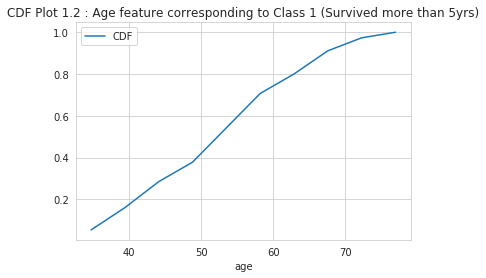

In [10]:
# According to Age with class 1 (Survived)

counts, bin_edges = np.histogram(survived['age'], bins=10, density=True)
pdf = counts / sum(counts)
print(f"Probability Density Function: {pdf}")
print(f"Bin Edges: {bin_edges}")

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.xlabel("age")
plt.title("CDF Plot 1.2 : Age feature corresponding to Class 1 (Survived more than 5yrs)")
plt.legend()
plt.show()

__Observation:__
1. It is clear from the plot that the age group 50-60 have greater rate of survival.
2. Almost 90% patient who survived have the age less than or equal to 70

Probability Density Function: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


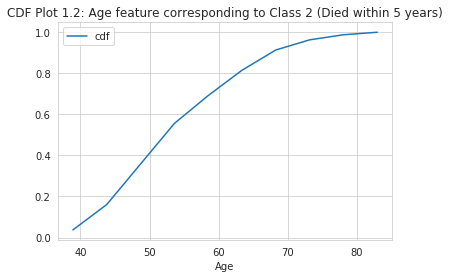

In [11]:
# According to Age with class 2 (Died)

counts, bin_edges = np.histogram(a=died['age'], bins=10, density=True)
pdf = counts / sum(counts)
print(f"Probability Density Function: {pdf}")
print(f"Bin Edges: {bin_edges}")

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label="cdf")
plt.xlabel("Age")
plt.title("CDF Plot 1.2: Age feature corresponding to Class 2 (Died within 5 years)")
plt.legend()
plt.show()

__Observation:__
1. It is observed that around 75% of patient who died within 5 years of surgery have an age less than or equal to 60 years.

Probability Density Function: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


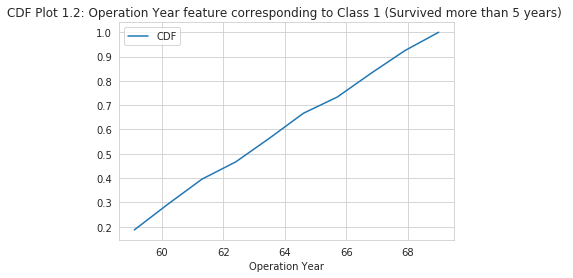

In [17]:
# Operation Year with class 1 (Survived longer than 5 years)
counts, bin_edges = np.histogram(a=survived['operationYear'], bins=10, density=True)
pdf = counts / sum(counts)
print(f"Probability Density Function: {pdf}")
print(f"Bin Edges: {bin_edges}")

cdf = np.cumsum(pdf)
plt.plot( bin_edges[1:], cdf, label="CDF")
plt.xlabel("Operation Year")
plt.title("CDF Plot 1.2: Operation Year feature corresponding to Class 1 (Survived more than 5 years) ")
plt.legend()
plt.show()

__Observation:__
1. From the CDF graph above, it can be inferred that 60% of the surgery took place before 1964 and survived more than 5 years. 

Probability Density Function: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin Edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


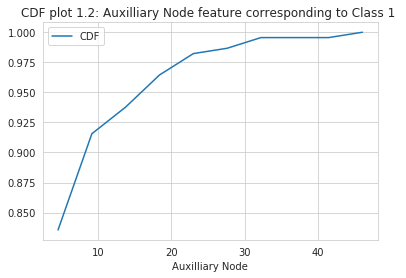

In [19]:
# Auxilliary Node with Class 1
counts, bin_edges = np.histogram(survived['auxilliaryNode'], bins=10, density=True)
pdf = counts / sum(counts)
print(f"Probability Density Function: {pdf}")
print(f"Bin Edges: {bin_edges}")

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.xlabel("Auxilliary Node")
plt.title("CDF plot 1.2: Auxilliary Node feature corresponding to Class 1 ")
plt.legend()
plt.show()

__Observation:__
1. Almost 91.5% of patient survived having auxilliary nodes less than 10. Hence, Lower the auxilliary nodes, higher the chances of survival.

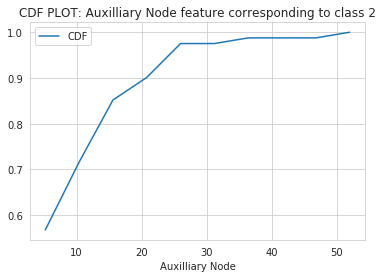

In [20]:
# Auxilliary  Node feature corresponding to class 2
counts, bin_edges = np.histogram(died["auxilliaryNode"], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.xlabel("Auxilliary Node")
plt.title("CDF PLOT: Auxilliary Node feature corresponding to class 2")
plt.legend()
plt.show()

__Observation:__
1. It is observed that 97% patients having less than 28 Auxilliary have died within 5 years of surgery.

#### 1.3 Box-plot

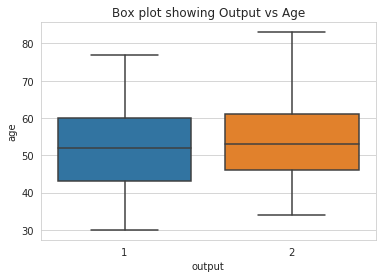

In [27]:
# Blox plot with various age groups of patients
sns.set_style('whitegrid')
sns.boxplot(x="output", y="age", data=haberman)
plt.title("Box plot showing Output vs Age")
plt.show()

__Observation:__
1. It can be inferred from the graph above that 95% of the data are overlapping with almost same 50th Percentile (median). Hence, age is not sufficient to classify our cases.

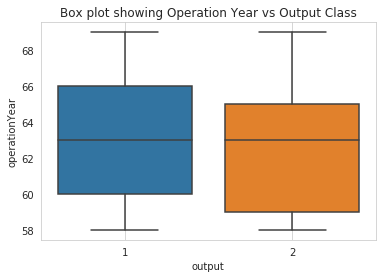

In [28]:
# Box plot with respeect to operation year
sns.boxplot(x="output", y="operationYear", data=haberman)
plt.grid()
plt.title("Box plot showing Operation Year vs Output Class")
plt.show()

__Observation:__
1. It is clear that almost 80% of data are overlapping with almost same median. Hence, operation year is not a sufficient to predict the patient who survived more or less than 5years.

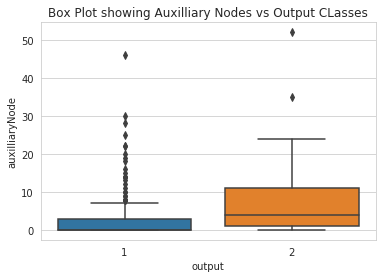

In [31]:
# Box plot with Auxilliary Nodes
sns.set_style("whitegrid")
sns.boxplot(x="output", y="auxilliaryNode", data=haberman)
plt.title("Box Plot showing Auxilliary Nodes vs Output CLasses")
plt.show()

__Observations:__
1. From the above box plot, it can be inferred that class 1 have outliers and around 50% of patients have auxilliary nodes less than or equal to 3.

#### 1.4 Violin Plot

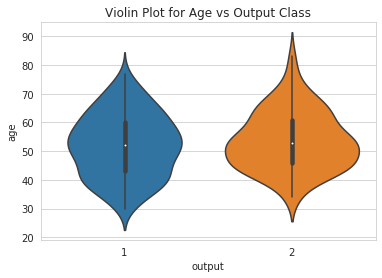

In [37]:
# Violin plot for age vs output class
sns.set_style("whitegrid")
sns.violinplot(x="output", y="age", data=haberman)
plt.title("Violin Plot for Age vs Output Class")
plt.show()

__Observation:__
1. Overlapping is seen among both the plots for class 1 and class 2 approximately 95%. 
2. So, age is not sufficient to predict the output classes.

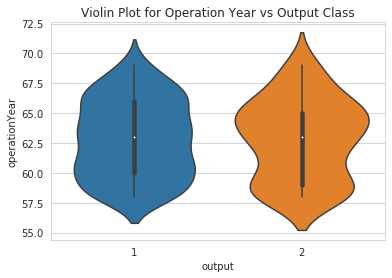

In [35]:
# Violin plot for operation year vs output class
sns.set_style("whitegrid")
sns.violinplot(x="output", y="operationYear", data=haberman)
plt.title("Violin Plot for Operation Year vs Output Class")
plt.show()

__Observation:__
1. Overlapping is seen among both the plots for class 1 and class 2 90% approximately. 
2. So, operation year is not sufficient to predict.

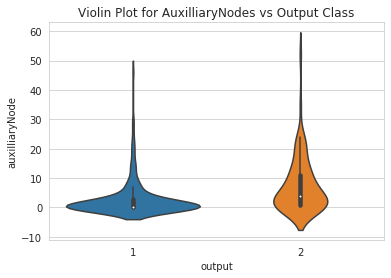

In [36]:
# Violin plot for Auxilliary Nodes vs output class
sns.set_style("whitegrid")
sns.violinplot(x="output", y="auxilliaryNode", data=haberman)
plt.title("Violin Plot for AuxilliaryNodes vs Output Class")
plt.show()

__Observation:__
1. The survived patients have axil nodes equal to zero. 
2. Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective patient is more likely to die.

### 2. Bivariate Analysis

#### 2.1 Scatter Plot 

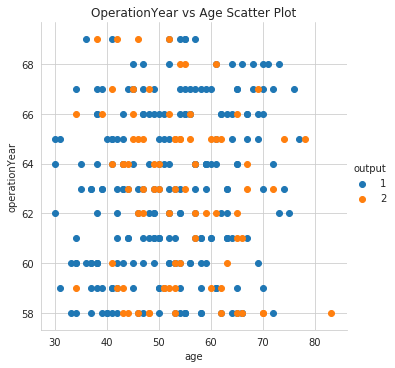

In [41]:
sns.set_style("whitegrid")
sns.FacetGrid(
    haberman,
    hue="output",
    size=5
).map(
    plt.scatter, 'age', 'operationYear'
).add_legend()
plt.title("OperationYear vs Age Scatter Plot")
plt.show()

__Observation:__
1. Here, there is an overlap of around 85%. So, to classify the survival of patients on the basis of Age and operation year results high error.

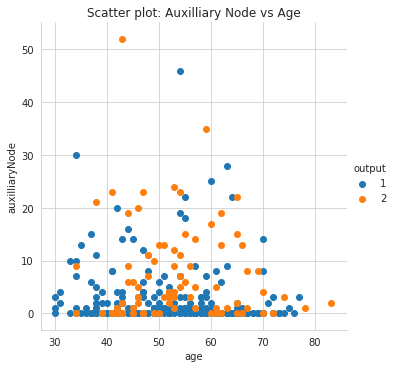

In [43]:
# Auxilliary Nodes vs Age
sns.set_style("whitegrid")
sns.FacetGrid(
    haberman,
    hue="output",
    size=5
).map(
    plt.scatter, "age", "auxilliaryNode"
).add_legend()
plt.title("Scatter plot: Auxilliary Node vs Age")
plt.show()

__Observation:__
1. Here, there is an overlap of around 80%. So, to classify the survival of patients on the basis of Age and auxilliary nodes results high error.

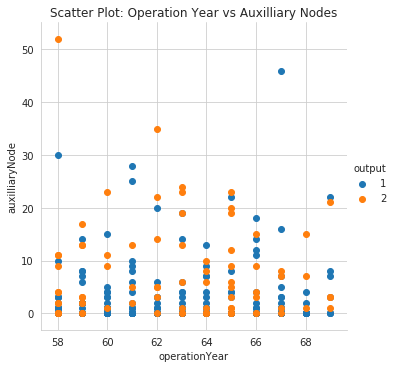

In [44]:
# Scatter plot: Operation year vs Auxilliary Nodes
sns.set_style("whitegrid")
sns.FacetGrid(
    haberman,
    hue = "output",
    size = 5
).map(
    plt.scatter, "operationYear", "auxilliaryNode"
).add_legend()
plt.title("Scatter Plot: Operation Year vs Auxilliary Nodes")
plt.show()

__Observation:__

1. Here, there is an overlap of around 90%. So, it is very difficult to classify the survival of patients who had undergone breast surgery on the basis of Operation Year and auxilliary nodes .

#### 2.2 Pair Plot

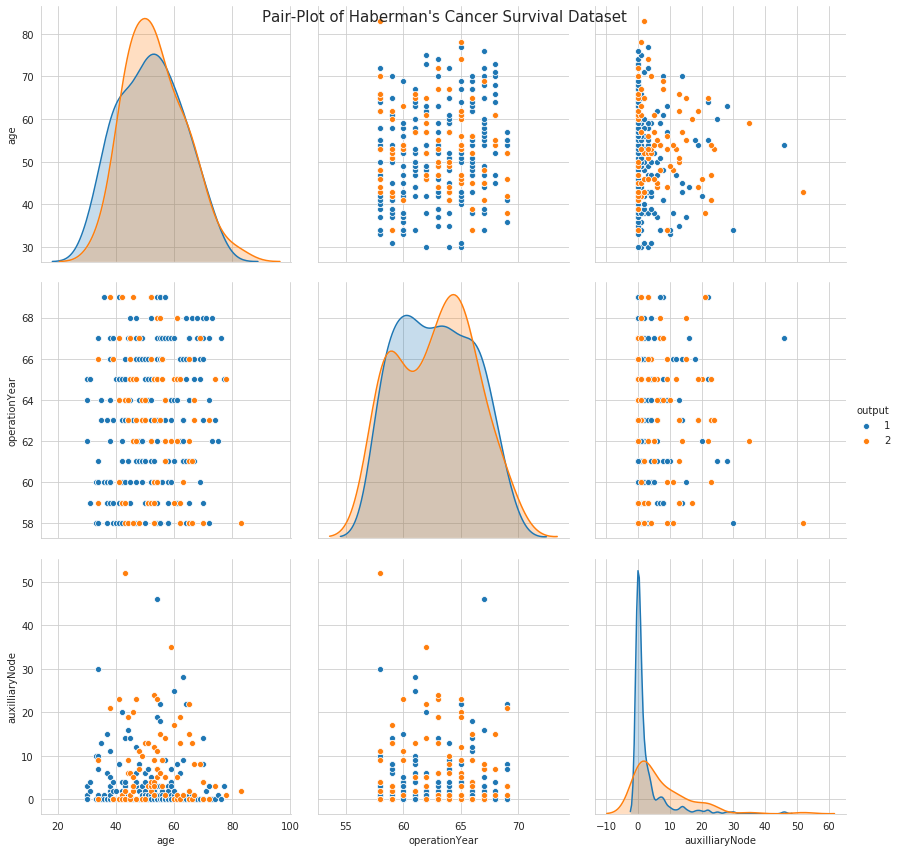

In [46]:
sns.set_style=("whitegrid")
sns.pairplot(data=haberman, hue="output", vars=['age', 'operationYear', 'auxilliaryNode'], size=4)
plt.suptitle("Pair-Plot of Haberman's Cancer Survival Dataset", size= 15)
plt.show()

__Observation:__
1. It is very difficult to predict the survival of the patients undergone surgery for breast cancer on the basis of these 3 features( Age, Operation Year, and Auxilliary Nodes) because both the classes are almost 80-90% overlapping with each other.
2. These two classes are linearly inseparable due to excessive overlapping.
3. Therefore, more useful features are required in order to predict the survival of the patients with higher accuracy.
4. Non-linear models can also be used alternatively.
5. Overall, auxilliary node is quite useful feature than other two features.